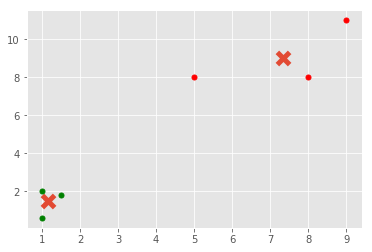

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[1,2],
            [1.5,1.8],
            [5,8],
            [8,8],
            [1,0.6],
            [9,11]])

# plt.scatter(X[:,0], X[:,1], s = 150, color='b')
# plt.show()

clf = KMeans(n_clusters=2)
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = 10*["g.","r.","c.","b.","k."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s=150, linewidth=5)
plt.show()

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd 

'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

df = pd.read_excel("/home/celebal/Downloads/titanic.xls")
df.drop(['body','name'],1,inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0,inplace=True)
# print(df.head())

def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals= {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
                     
            df[column] = list(map(convert_to_int, df[column]))
    return df
df = handle_non_numeric_data(df)
print(df.head())
             

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    0  29.0000      0      0     751  211.3375    164   
1       1         1    1   0.9167      1      2     504  151.5500     31   
2       1         0    0   2.0000      1      2     504  151.5500     31   
3       1         0    1  30.0000      1      2     504  151.5500     31   
4       1         0    0  25.0000      1      2     504  151.5500     31   

   embarked  boat  home.dest  
0         1     2        130  
1         1     8         90  
2         1     0         90  
3         1     0         90  
4         1     0         90  


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
